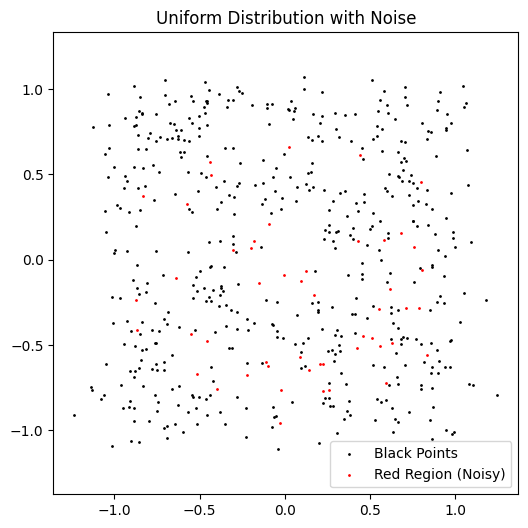

(2, 50)
(2, 500)
数据已保存到 plot2_noisy_10 文件夹下


In [1]:
# 生成circle的噪声为0.02的数据集

import numpy as np
import matplotlib.pyplot as plt
import os

# 定义参数
n_red = 50  # 红色区域点的数量
n_black = 500  # 黑色区域点的数量
inner_radius = 0.3     # 实心圆的半径
outer_radius_min = 0.6 # 环的内半径
outer_radius_max = 0.8 # 环的外半径
noise_std = 0.1       # 噪声标准差

# 定义红色区域判定函数
def is_in_red_region(x, y):
    distance = np.sqrt(x**2 + y**2)
    # 定义十字线区域
    in_horizontal_cross = (-1.0 <= x <= 1.0) and (-0.02 <= y <= 0.02)  # 水平线
    in_vertical_cross = (-0.02 <= x <= 0.02) and (-1.0 <= y <= 1.0)  # 垂直线
    # 判断是否在红色区域
    return (distance <= inner_radius or 
            (outer_radius_min <= distance <= outer_radius_max) or 
            in_horizontal_cross or in_vertical_cross)

# 生成红色区域的均匀分布点并添加噪声
red_x, red_y = [], []
while len(red_x) < n_red:
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if is_in_red_region(x, y):
        red_x.append(x + np.random.normal(0, noise_std))
        red_y.append(y + np.random.normal(0, noise_std))

# 生成黑色区域的均匀分布点并添加噪声
black_x, black_y = [], []
while len(black_x) < n_black:
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if not is_in_red_region(x, y):
        black_x.append(x + np.random.normal(0, noise_std))
        black_y.append(y + np.random.normal(0, noise_std))

# 绘图
plt.figure(figsize=(6, 6))
plt.scatter(black_x, black_y, c='black', s=1, label="Black Points")
plt.scatter(red_x, red_y, c='red', s=1, label="Red Region (Noisy)")
plt.title("Uniform Distribution with Noise")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis("equal")
plt.legend()
plt.show()

# 定义保存路径
noisy_size = f"{int(noise_std * 100)}"
save_dir = f"plot2_noisy_{noisy_size}"
os.makedirs(save_dir, exist_ok=True)

# 保存红色区域数据
red_data = np.array([red_x, red_y])
np.save(os.path.join(save_dir, "red_region_noisy_test.npy"), red_data)

# 保存黑色区域数据
black_data = np.array([black_x, black_y])
np.save(os.path.join(save_dir, "black_region_noisy_test.npy"), black_data)

# 加载验证
load_black_data = np.load(os.path.join(save_dir, "black_region_noisy_test.npy"))
load_red_data = np.load(os.path.join(save_dir, "red_region_noisy_test.npy"))
print(load_red_data.shape)
print(load_black_data.shape)

print(f"数据已保存到 {save_dir} 文件夹下")


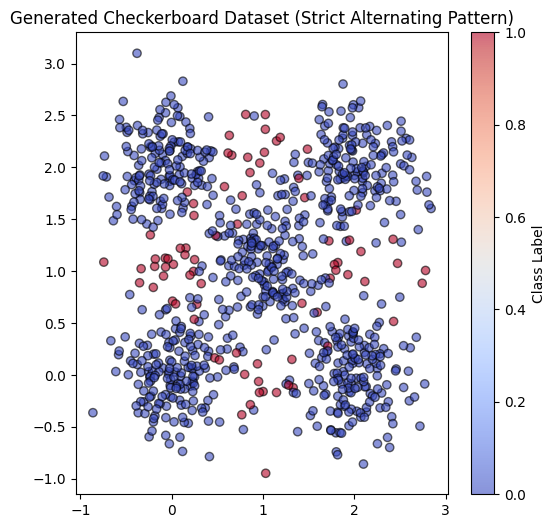

In [22]:
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt

# 加载不平衡的棋盘数据集
def generate_imbalanced_checkerboard_data(n_samples_class0=400, n_samples_class1=50, grid_size=3, cluster_std=0.03):
    centers = []
    labels = []
    for i in range(grid_size):
        for j in range(grid_size):
            centers.append((i, j))
            labels.append((i + j) % 2)  # 交替标签，确保相邻格子颜色不同
    
    X = []
    y = []
    for center, label in zip(centers, labels):
        n_samples = n_samples_class0 if label == 0 else n_samples_class1  # 根据标签分配不同的样本数
        X_blob = np.random.multivariate_normal(center, np.eye(2) * cluster_std, n_samples)
        X.extend(X_blob)
        y.extend([label] * n_samples)
    
    return np.array(X), np.array(y)

cluster_std = 0.1

# 创建用于保存图像和数据的文件夹
output_dir = f"checkboard_plot_{int(cluster_std * 100)}"
os.makedirs(output_dir, exist_ok=True)

# 生成数据并划分训练集和测试集
X, y = generate_imbalanced_checkerboard_data(cluster_std=cluster_std)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 保存生成的原始数据集
np.save(os.path.join(output_dir, "X_test.npy"), X)
np.save(os.path.join(output_dir, "y_test.npy"), y)

# 可视化生成的棋盘数据集并显示和保存为 PNG
plt.figure(figsize=(6, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.6, edgecolor='k')
plt.title("Generated Checkerboard Dataset (Strict Alternating Pattern)")
plt.colorbar(scatter, orientation='vertical', label='Class Label')
plt.savefig(os.path.join(output_dir, "Checkerboard_Dataset.png"), format="png")
plt.show()